# Real World Project On
# The Titanic Dataset 

1st Import All the Librarys

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# In this dataset we simply just analyes the how many people survived from that Accident & also handle missing value and plote some visualisation.

In [2]:
data=pd.read_csv(r'C:\Users\shiva\OneDrive\Desktop\CSV,TEXT,FILES\titanic passenger list.csv')

In [3]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
#To know about howmuch row's and columns are present in the dataset we use the command.shape
data.shape

(1309, 14)

In [5]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# After seeing dataset ,1st thing first we have to check How many null values are present in the data set 



In [6]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# Now we have to handal this nan values
## Nan values means the missing data from the some of variabls


To check the percentage of the nan values in the data

In [7]:
data.isnull().mean().sort_values(ascending=True)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

*Also we check the nan values from dataset by ploting some visuals

<AxesSubplot:>

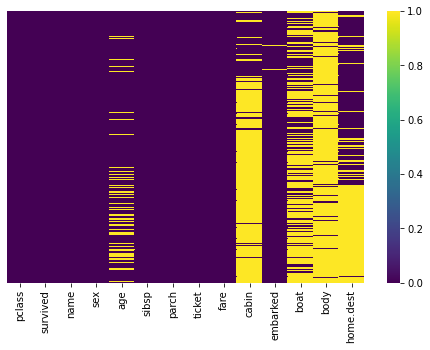

In [8]:
plt.figure(figsize=(8,5))
 
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

The columns {age,cabin, boat, body, home dest} these variables having more number of nan values ,but in the age columns the missing values are not more than other columns .now we going to handel these values 



As we discussed above we are going to analyse the Survied people

<AxesSubplot:xlabel='survived', ylabel='count'>

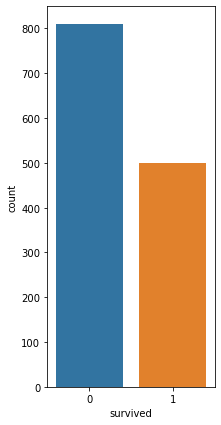

In [9]:
plt.figure(figsize=(3,7))

sns.countplot(x='survived',data=data)

<AxesSubplot:xlabel='survived', ylabel='count'>

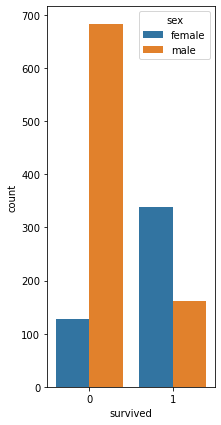

In [10]:
plt.figure(figsize=(3,7))
sns.countplot(x='survived',data=data,hue='sex')

Here We visualise the survived columns and , in the columns the person who survived indicated by [0] and the person who do not survived is indicated by the [1]. mans it shows the count of both categogry ,on the basis of 'Gender'. male & female.

<AxesSubplot:xlabel='survived', ylabel='count'>

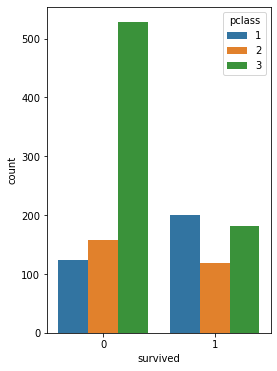

In [11]:
plt.figure(figsize=(4,6))
sns.countplot(x='survived',data=data,hue='pclass')

On the above graph we checking the people who survived on the basis of passengerClass

<AxesSubplot:xlabel='age', ylabel='Count'>

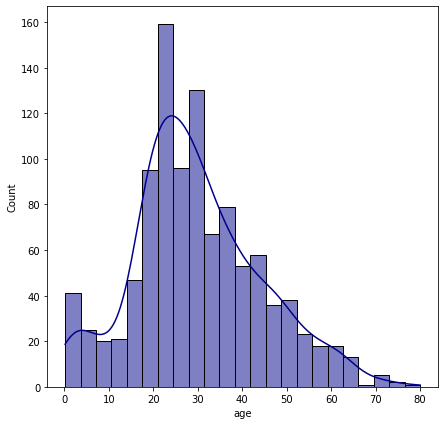

In [12]:
plt.figure(figsize=(7,7))
sns.histplot(data['age'].dropna(),color='darkblue',kde=True)

**Here we are now plot countplot to see the how many people have siblig of spouces

<AxesSubplot:xlabel='sibsp', ylabel='count'>

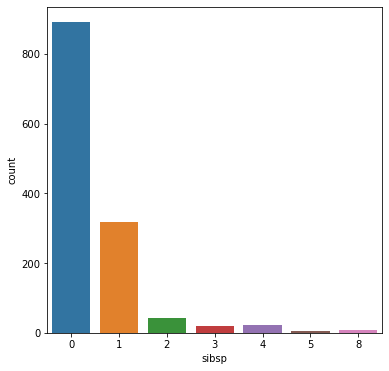

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sibsp',data=data,)

## Now we are going to handle the missing values 

Here the data of 4 columns have so many nan values , for that we are now replace that nan values or dorp that perticuler block 

In [14]:
data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

So we are drop that column which has too much nan values

In [16]:
data.drop(['cabin','body','boat','home.dest','name','ticket'],axis=1,inplace=True)

# Now let's go and handel some categorical feature

In [17]:
data.head(2)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S


# DATA CLEANING

<AxesSubplot:>

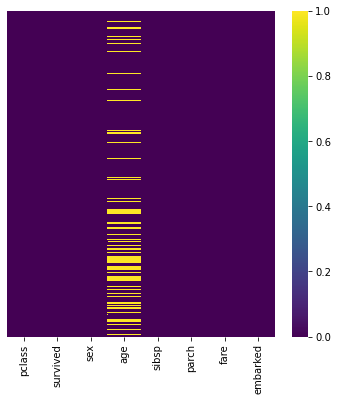

In [18]:
plt.figure(figsize=(6,6))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

Asper the above heatmap the column('age') having so many null values to handle this values we apply some functions

In [19]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S


In [20]:
data.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

<AxesSubplot:xlabel='pclass', ylabel='age'>

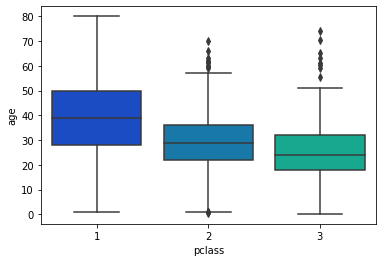

In [21]:
sns.boxplot(x='pclass',y='age',palette='winter',data=data)

In [22]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        
        
        elif pclass==2:
            return 29
        
        
        else:
            return 24
    else:
        return age

In [23]:
data['age']=data[['age','pclass']].apply(impute_age,axis=1)

In [24]:
data.head(20)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S
5,1,1,male,48.00,0,0,26.5500,S
6,1,1,female,63.00,1,0,77.9583,S
7,1,0,male,39.00,0,0,0.0000,S
8,1,1,female,53.00,2,0,51.4792,S
9,1,0,male,71.00,0,0,49.5042,C


In [25]:
data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    2
dtype: int64

In [26]:
data['embarked'].isnull().sum()

2

In [27]:
data['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [28]:
data["embarked"].fillna("S", inplace = True)

In [29]:
data['embarked'].isnull().sum()

0

In [30]:
data['fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
6.2375      1
7.7417      1
28.5375     1
12.6500     1
10.7083     1
Name: fare, Length: 281, dtype: int64

In [31]:
data['fare'].fillna('70',inplace=True)

In [32]:
data['fare'].isnull().sum()

0

In [33]:
data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [34]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.55,S
2,1,0,female,2.00,1,2,151.55,S
3,1,0,male,30.00,1,2,151.55,S
4,1,0,female,25.00,1,2,151.55,S


here we successfully HANDLE all the Null values!!!!

# Handling Categorical Feature

In [36]:
pd.get_dummies(data['embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
sex=pd.get_dummies(data['sex'],drop_first=True)
embrk=pd.get_dummies(data['embarked'],drop_first=True)

In [38]:
data.head(2)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.55,S


In [39]:
data.drop(['sex','embarked'],axis=1,inplace=True)

In [40]:
data.head(2)

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.00,0,0,211.3375
1,1,1,0.92,1,2,151.55


In [43]:
data=pd.concat([data,sex,embrk],axis=1)

In [44]:
data.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1,1,29.00,0,0,211.3375,0,0,1
1,1,1,0.92,1,2,151.55,1,0,1
2,1,0,2.00,1,2,151.55,0,0,1
3,1,0,30.00,1,2,151.55,1,0,1
4,1,0,25.00,1,2,151.55,0,0,1


And Here is our data is ready !!!

# Applying some Logistic Regression

TILL NOW WE HANDLE THE MISSING VALUES and CATEGRICAL VALUE  OF DATA AND NOW BY APPLYING SOME LOGISTIC REGRESSION WE PREDICT THE ACCURACY

Let's satrt by spilinting our data in to Traning set and test set(there is another test.csv file that you can play around
with in case we want to all this data for traning) 

In [45]:
data.drop('survived',axis=1).head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,1,29.00,0,0,211.3375,0,0,1
1,1,0.92,1,2,151.55,1,0,1
2,1,2.00,1,2,151.55,0,0,1
3,1,30.00,1,2,151.55,1,0,1
4,1,25.00,1,2,151.55,0,0,1


In [47]:
data['survived'].head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
x_data, x_test, y_data, y_test =train_test_split(data.drop('survived',axis=1),data['survived'],test_size=0.30,random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel=LogisticRegression()
logmodel.fit(x_data,y_data)

C:\Users\shiva\anaconda3\dataanalist01\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
predictions=logmodel.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [64]:
accuracy=confusion_matrix(y_test,predictions)

In [65]:
accuracy

array([[205,  35],
       [ 45, 108]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7964376590330788

ABOVE WE CALCULATE THE ACCURACY OF THE DATA

# HERE WE SUCCESSFULLY COMPLET THE EXPLORATORY DATA ANALYSIS